<a href="https://colab.research.google.com/github/shyamsivasankar/PINACA-LABS/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 2

In [7]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
import re
from nltk.corpus import stopwords

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')

In [6]:
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [8]:
def clean_text(text):
    text = text.lower() # convert text to lowercase
    text = re.sub(r'\d+', '', text) # remove digits
    text = re.sub(r'[^\w\s]', '', text) # remove punctuation
    text = text.strip() # remove leading and trailing whitespaces
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')]) # remove stop words
    return text

In [9]:
df['clean_review'] = df['Review'].apply(clean_text)

In [10]:
df

,Review,Rating,clean_review
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms experience hotel monaco seattle goo...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,best kept secret rd time staying charm star ca...
20487,great location price view hotel great quick pl...,4,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",2,ok looks nice modern outside desk staff nt par...
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruined vacation hotel opened sept ...


In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### FREQUENCY COUNTS

In [14]:
from nltk.probability import FreqDist

In [16]:
tokens = nltk.word_tokenize(' '.join(df['clean_review'].tolist()))
freq_dist = FreqDist(tokens)

In [19]:
for i in freq_dist.most_common(5):
  print(i)

('hotel', 48864)
('room', 34324)
('great', 21094)
('nt', 19000)
('good', 16986)


### N-GRAMS

In [20]:
from nltk.util import ngrams

In [31]:
def get_ngrams(text, n):
    tokens = nltk.word_tokenize(text)
    return list(ngrams(tokens, n))

##### N-GRAMS [n=3]

In [32]:
tri_grams = [get_ngrams(review, 3) for review in df['clean_review'].tolist()]
tri_grams = [item for sublist in tri_grams for item in sublist]
freq_dist = FreqDist(tri_grams)
for i in freq_dist.most_common(5):
  print(i)

(('staff', 'friendly', 'helpful'), 702)
(('hotel', 'great', 'location'), 541)
(('room', 'th', 'floor'), 397)
(('old', 'san', 'juan'), 354)
(('highly', 'recommend', 'hotel'), 313)


##### N-GRAMS [n=4]

In [34]:
quad_grams = [get_ngrams(review, 4) for review in df['clean_review'].tolist()]
quad_grams = [item for sublist in quad_grams for item in sublist]
freq_dist = FreqDist(quad_grams)
for i in freq_dist.most_common(5):
  print(i)

(('great', 'hotel', 'great', 'location'), 106)
(('hotel', 'staff', 'friendly', 'helpful'), 71)
(('ca', 'nt', 'wait', 'return'), 60)
(('hotel', 'great', 'location', 'stayed'), 54)
(('staff', 'extremely', 'friendly', 'helpful'), 52)


### SENTIMENT ANALYSIS

In [37]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [38]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [39]:
sia = SentimentIntensityAnalyzer()
sentiments = [sia.polarity_scores(review) for review in df['clean_review'].tolist()]
average_sentiment = sum([sentiment['compound'] for sentiment in sentiments]) / len(sentiments)
print(average_sentiment)

0.8564255136401442


## VISUALIZATION

#### WORD CLOUD

In [40]:
from wordcloud import WordCloud

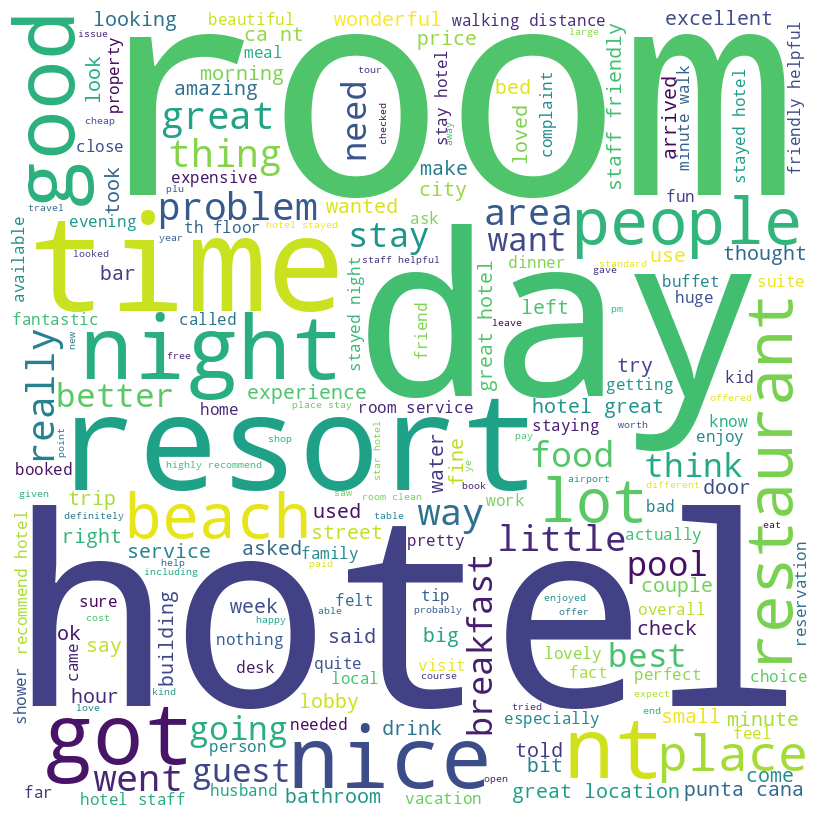

In [41]:
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10)
wordcloud.generate_from_text(' '.join(df['clean_review'].tolist()))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### SCATTER PLOT

In [49]:
df['word_count'] = df['clean_review'].apply(lambda x: len(x.split()))
df

,Review,Rating,clean_review,word_count
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,80
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,230
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms experience hotel monaco seattle goo...,199
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,85
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,178
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,best kept secret rd time staying charm star ca...,106
20487,great location price view hotel great quick pl...,4,great location price view hotel great quick pl...,39
20488,"ok just looks nice modern outside, desk staff ...",2,ok looks nice modern outside desk staff nt par...,61
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruined vacation hotel opened sept ...,738


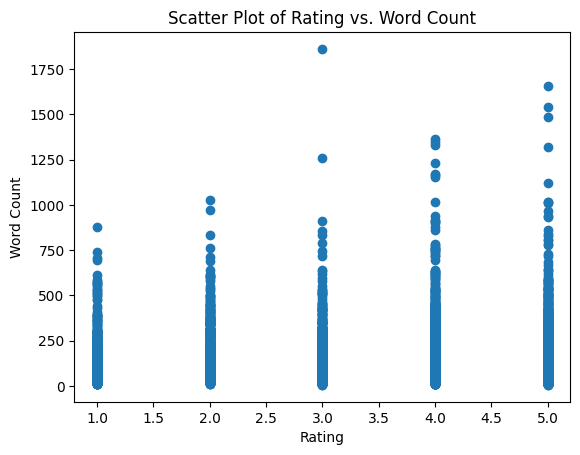

In [50]:
x = df['Rating']
y = df['word_count']
plt.scatter(x, y)
plt.xlabel('Rating')
plt.ylabel('Word Count')
plt.title('Scatter Plot of Rating vs. Word Count')
plt.show()

### TOPIC MODELING

In [53]:
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(df['clean_review'].apply(lambda x: x.split()))
corpus = [dictionary.doc2bow(review.split()) for review in df['clean_review']]
num_topics = 10
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)
for topic in lda_model.show_topics(num_topics=num_topics, formatted=False):
    print('Topic {}: {}'.format(topic[0], ', '.join([word[0] for word in topic[1]])))


Topic 0: room, hotel, nt, told, night, stay, day, staff, got, rooms
Topic 1: excelent, core, rudest, slant, apr, complimentry, hotelif, manor, remarkably, outer
Topic 2: pool, beach, food, great, service, restaurant, good, bar, nice, area
Topic 3: topless, stage, sofitel, cubicle, overbearing, adored, inconveniences, lugging, moma, permanent
Topic 4: hotel, room, great, location, good, staff, breakfast, clean, stay, rooms
Topic 5: hotel, room, nice, nt, stay, great, good, rooms, location, night
Topic 6: hotel, staff, stay, great, service, stayed, wonderful, best, friendly, excellent
Topic 7: card, credit, service, toronto, reservation, booking, business, orchard, received, email
Topic 8: resort, beach, nt, food, good, time, great, people, day, water
Topic 9: tremendous, wonderfull, excellant, karaoke, organise, daywe, monica, centres, established, encouraged
